## Preparing the target distribution of the MCMC Algorithms

Defining the function to generate the true parameter of the Mixture Gaussian Model and generating the Dataset with the setted parameters.  

In [12]:
import numpy as np

class Data_params_gen_GMM:
    def __init__(self, n_components, n_dimensions, weights=[], mus=[], Sigmas=[], random_seed=123) -> None:
        """
        
        initialize the Gaussian Mixture Model datapoint generator

        Arguments
        ---------
        n_components (int): the number of components of the Gaussian Mixture Model
        n_dimensiona (int): the number of the dimension of the output datapoints
        weightes (np.array); the weight of each gaussian model
        mus (np.array): the mean of each gaussian model
        Sigmas (np.array): the variance covariance matrix of each gaussian model
        random_seed (int): the random seed

        Returns
        -------
        None
        
        """

        self.n_components = n_components
        self.n_dimensions = n_dimensions
        if list(weights):
            self.weights = weights
        else:
            self.weights = np.asarray(np.random.choice(range(1, 100+1), size=n_components), dtype=np.float64)
            self.weights /= np.sum(self.weights)
        if list(mus):
            self.mus = mus
        else:
            self.mus = np.random.choice(range(10), size=(self.n_components, self.n_dimensions))

        if list(Sigmas):
            self.Sigmas = Sigmas
        else:
            self.Sigmas = np.asarray([np.eye(N=n_dimensions, M=n_dimensions) for _ in range(n_components)])

        np.random.seed(random_seed)

    def generate(self, datasize, noise_scale=0.1, add_noise=True):

        """

        Generate datapints with setted parameter values 

        Arguments
        ---------
        datasize (int): the number of the datapoints of the output dataset
        noise_scale (float): the Gaussian noise added to the output datapoints
        add_noise (bool): deciding whether to add gaussian noise to the output dataset

        """

        self.Dataset = np.zeros((datasize, self.n_dimensions))
        Idxes = np.random.choice(self.n_components, size=datasize, p=self.weights)

        # Generating pure dataset
        for i in range(self.n_components):
            Idx = (Idxes==i)
            self.Dataset[Idx, :] = np.random.multivariate_normal(mean=self.mus[i], cov=self.Sigmas[i], size=np.sum(Idx))

        if add_noise:
            # Adding noise to the dataset
            noise = np.random.normal(loc=0, scale=noise_scale, size=self.Dataset.shape)
            self.noisy_Dataset = self.Dataset + noise
            return self.Dataset, self.noisy_Dataset
        else:
            return self.Dataset


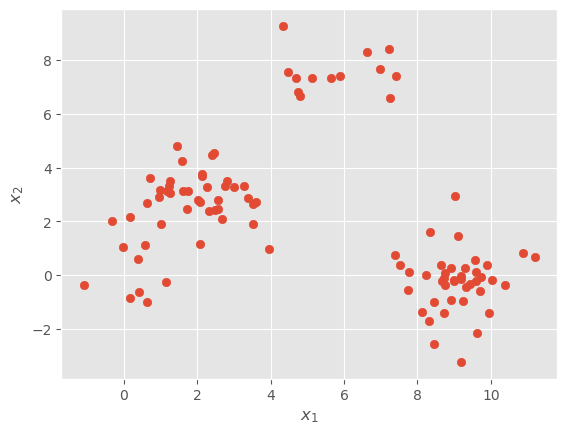

In [16]:
import matplotlib.pyplot as plt

GMM_data_2D_4com = Data_params_gen_GMM(n_components=4, n_dimensions=2)
_,_ = GMM_data_2D_4com.generate(datasize=100)

with plt.style.context("ggplot"):
    plt.scatter(GMM_data_2D_4com.Dataset[:, 0], GMM_data_2D_4com.Dataset[:, 1])
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()
